In [ ]:
pip install numpy pandas torch matplotlib seaborn emoji nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 13.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

Read the Data in

In [ ]:
real_test = pd.read_csv("https://github.com/rrandev03/NLP_Final/raw/refs/heads/main/100_data/102_processed/real_testing_data.csv")
real_train = pd.read_csv('https://github.com/rrandev03/NLP_Final/raw/refs/heads/main/100_data/102_processed/real_training_data.csv')

In [ ]:
pd.set_option("display.max_colwidth", None)

real_train.head()

,Unnamed: 0,Date,Tweet_Content,Manual_Training_Labels
0,0,2020-01-06,Rivian Electric Vehicles To Offer Alexa Capability https://t.co/FldqbOdxHC https://t.co/WKBczVrNVn,NEUTRAL
1,1,2020-01-07,RenewOregon: Electric vehicles face an uncertain policy landscape in 2020 #ElectricVehicle via @axios https://t.co/Xp9eUOoGH6 https://t.co/bsuJMC09tJ,NEUTRAL
2,2,2020-01-07,Really interesting chat about what’s going on with #transportation in San Francisco #micromobility https://t.co/zUQQU8nm2e,POSITIVE
3,3,2020-01-07,"As consumers, we're used to a lot of things that make our lives easier with ICE cars. We can fill up practically anywhere, we know how they work, how they shift, we understand them. For electric vehicles, none of that is the same. #CES2020\n\nhttps://t.co/BWChozt9GJ",NEGATIVE
4,4,2020-01-13,"With Model Y deliveries planned to begin this summer, our estimate is Tesla will deliver 506,000 electric vehicles in 2020 excl. SEMI. If Tesla grows sales at 20% a year after 2020 it could deliver 1.05 million vehicles in 2024.\nWhat year will Tesla reach 1 million deliveries?",NEUTRAL


In [ ]:
real_test.head()

,Unnamed: 0,Date,Tweet_Content,Manual_Testing_Labels
0,0,2020-02-07,"Find out why electric vehicles are a smart transportation choice and plug in to even more reasons to make the switch by visiting the Home, Garden &amp; Remodeling Show from Feb. 28 to March 1 and stop by the LG&amp;E and KU booth. Learn more at https://t.co/cc7JEBsLuU. #hgrs2020 https://t.co/PeFeRP9EOs",POSITIVE
1,1,2020-02-08,How Soon Will Electric Vehicles Kill The Gasoline Car? https://t.co/Nivn9TmVqA https://t.co/58DlNr2gyz,NEUTRAL
2,2,2020-02-18,"AI delivers a battery boost to electric vehicles, slashing testing times #98% #TechRepublic https://t.co/pV2gMmSRqm @TechRepublic https://t.co/DhuMNrxRuh",NEUTRAL
3,3,2020-03-04,"There is so much anti-electric vehicles propaganda around, kids have started repeating it recently: “Oh, EVs aren’t clean because of how batteries are made and how they're discarded""\n\nEp. 31 of #TheAngryCleanEnergyGuy podcast sets out what to do about it\n\nhttps://t.co/G5jXbcCqdF https://t.co/5Nv4ZbiEfl",POSITIVE
4,4,2020-03-17,"With the purchase of fully electric vehicles and the development of a tailor made Electric Government Vehicles(EGV) course, PROCentrum Driving is proudly the first professional European trainer in this new field.",NEUTRAL


In [ ]:
train_df = real_train[['Tweet_Content', 'Manual_Training_Labels']]
test_df = real_test[['Tweet_Content', 'Manual_Testing_Labels']]

Data Pre Processing

In [ ]:
import re, string
import emoji
import nltk

In [ ]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.replace_emoji(text, replace='')  # Remove emoji by replacing them with an empty string

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [ ]:
texts_new = []
for t in train_df.Tweet_Content:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

train_df['Cleaned_Tweets'] = texts_new
train_df.head()

<ipython-input-9-95793eb7b57c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Cleaned_Tweets'] = texts_new


,Tweet_Content,Manual_Training_Labels,Cleaned_Tweets
0,Rivian Electric Vehicles To Offer Alexa Capability https://t.co/FldqbOdxHC https://t.co/WKBczVrNVn,NEUTRAL,rivian electric vehicles to offer alexa capability
1,RenewOregon: Electric vehicles face an uncertain policy landscape in 2020 #ElectricVehicle via @axios https://t.co/Xp9eUOoGH6 https://t.co/bsuJMC09tJ,NEUTRAL,reneworegon electric vehicles face an uncertain policy landscape in 2020 electricvehicle via
2,Really interesting chat about what’s going on with #transportation in San Francisco #micromobility https://t.co/zUQQU8nm2e,POSITIVE,really interesting chat about whats going on with transportation in san francisco micromobility
3,"As consumers, we're used to a lot of things that make our lives easier with ICE cars. We can fill up practically anywhere, we know how they work, how they shift, we understand them. For electric vehicles, none of that is the same. #CES2020\n\nhttps://t.co/BWChozt9GJ",NEGATIVE,as consumers were used to a lot of things that make our lives easier with ice cars we can fill up practically anywhere we know how they work how they shift we understand them for electric vehicles none of that is the same ces2020
4,"With Model Y deliveries planned to begin this summer, our estimate is Tesla will deliver 506,000 electric vehicles in 2020 excl. SEMI. If Tesla grows sales at 20% a year after 2020 it could deliver 1.05 million vehicles in 2024.\nWhat year will Tesla reach 1 million deliveries?",NEUTRAL,with model y deliveries planned to begin this summer our estimate is tesla will deliver 506000 electric vehicles in 2020 excl semi if tesla grows sales at 20 a year after 2020 it could deliver 105 million vehicles in 2024 what year will tesla reach 1 million deliveries


In [ ]:
texts_new = []
for t in test_df.Tweet_Content:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

test_df['Cleaned_Tweets'] = texts_new
test_df.head()

<ipython-input-10-873a2fd04426>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Cleaned_Tweets'] = texts_new


,Tweet_Content,Manual_Testing_Labels,Cleaned_Tweets
0,"Find out why electric vehicles are a smart transportation choice and plug in to even more reasons to make the switch by visiting the Home, Garden &amp; Remodeling Show from Feb. 28 to March 1 and stop by the LG&amp;E and KU booth. Learn more at https://t.co/cc7JEBsLuU. #hgrs2020 https://t.co/PeFeRP9EOs",POSITIVE,find out why electric vehicles are a smart transportation choice and plug in to even more reasons to make the switch by visiting the home garden amp remodeling show from feb 28 to march 1 and stop by the lgampe and ku booth learn more at hgrs2020
1,How Soon Will Electric Vehicles Kill The Gasoline Car? https://t.co/Nivn9TmVqA https://t.co/58DlNr2gyz,NEUTRAL,how soon will electric vehicles kill the gasolinecar
2,"AI delivers a battery boost to electric vehicles, slashing testing times #98% #TechRepublic https://t.co/pV2gMmSRqm @TechRepublic https://t.co/DhuMNrxRuh",NEUTRAL,ai delivers a battery boost to electric vehicles slashing testing times 98 techrepublic
3,"There is so much anti-electric vehicles propaganda around, kids have started repeating it recently: “Oh, EVs aren’t clean because of how batteries are made and how they're discarded""\n\nEp. 31 of #TheAngryCleanEnergyGuy podcast sets out what to do about it\n\nhttps://t.co/G5jXbcCqdF https://t.co/5Nv4ZbiEfl",POSITIVE,there is so much antielectric vehicles propaganda around kids have started repeating it recently oh evs arent clean because of how batteries are made and how theyre discarded ep 31 of theangrycleanenergyguy podcast sets out what to do about it
4,"With the purchase of fully electric vehicles and the development of a tailor made Electric Government Vehicles(EGV) course, PROCentrum Driving is proudly the first professional European trainer in this new field.",NEUTRAL,with the purchase of fully electric vehicles and the development of a tailor made electric government vehiclesegv course procentrum driving is proudly the first professional european trainer in this new field


Importing Transformers

In [ ]:
#transformers
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

token_lens = []

for txt in train_df['Cleaned_Tweets'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH FOR TRAINING DATA: {max_len}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

MAX TOKENIZED SENTENCE LENGTH FOR TRAINING DATA: 78


In [ ]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

token_lens = []

for txt in test_df['Cleaned_Tweets'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))

max_len=np.max(token_lens)
print(f"MAX TOKENIZED SENTENCE LENGTH FOR TESTING DATA: {max_len}")

MAX TOKENIZED SENTENCE LENGTH FOR TESTING DATA: 67


In [ ]:
test_df = test_df.sample(frac=1).reset_index(drop=True)

Tweet Label Column Analysis

In [ ]:
train_df.loc[train_df['Manual_Training_Labels'] == 'NEGTIVE', 'Manual_Training_Labels'] = 'NEGATIVE'
train_df['Manual_Training_Labels'] = train_df['Manual_Training_Labels'].str.strip()
train_df['Manual_Training_Labels'].value_counts()

,count
Manual_Training_Labels,
NEUTRAL,101
POSITIVE,62
NEGATIVE,37


In [ ]:
train_df['Sentiment'] = train_df['Manual_Training_Labels'].map({'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2})


In [ ]:
test_df['Manual_Testing_Labels'] = test_df['Manual_Testing_Labels'].str.strip()
test_df['Manual_Testing_Labels'].value_counts()


,count
Manual_Testing_Labels,
NEUTRAL,53
POSITIVE,30
NEGATIVE,20


In [ ]:
test_df['Sentiment'] = test_df['Manual_Testing_Labels'].map({'NEGATIVE':0,'NEUTRAL':1,'POSITIVE':2})
test_df

,Tweet_Content,Manual_Testing_Labels,Cleaned_Tweets,Sentiment
0,Heard that Tailing Electric Vehicles is going to have a new friend. Any idea? https://t.co/D8OBkLUGgt,NEUTRAL,heard that tailing electric vehicles is going to have a new friend any idea,1
1,"Coronavirus dampens 2020 outlook for clean energy and electric vehicles, as IEA calls for green stimulus https://t.co/xtqbM4vFVl",NEUTRAL,coronavirus dampens 2020 outlook for clean energy and electric vehicles as iea calls for green stimulus,1
2,"Tesla delivers 88,400 electric vehicles, beating expectations https://t.co/85MVf85CZH https://t.co/p52LM1IOJW",NEUTRAL,tesla delivers 88400 electric vehicles beating expectations,1
3,"WATCH: British company Lunaz rebuilds old diesel-powered recycling trucks into electric vehicles, which are said to be greener and cheaper than an all-new electric equivalent https://t.co/gatIpAnSi3",NEUTRAL,watch british company lunaz rebuilds old dieselpowered recycling trucks into electric vehicles which are said to be greener and cheaper than an allnew electric equivalent,1
4,New Approach for Integrating Electric Vehicles into Power Grid\nhttps://t.co/BVzXshI6ZP https://t.co/hcH1iXb9qo,NEUTRAL,new approach for integrating electric vehicles into power grid,1
...,...,...,...,...
98,"Help us predict the future of electric vehicles. \n\nJoin the Climate Tipping Points Tournament below, with our friends at @metaculus \nhttps://t.co/5r35Udn1Bm",NEUTRAL,help us predict the future of electric vehicles join the climate tipping points tournament below with our friends at,1
99,Clean mobility will be the future of transportation. Electric Vehicles are currently the most viable option of clean mobility and they are fueled by electricity which eliminates emissions. \nhttps://t.co/8ZkuSxLimw https://t.co/Lhf7SHTCXd,POSITIVE,clean mobility will be the future of transportation electric vehicles are currently the most viable option of clean mobility and they are fueled by electricity which eliminates emissions,2
100,UK: Government’s reported scrappage scheme for petrol and diesel cars welcomed by motoring and environmental groups https://t.co/z63IXLjoMn\nIncentivising uptake of new electric vehicles would boost car industry which has seen demand collapse due to Covid-19 https://t.co/XPEVHl1L7D,POSITIVE,uk governments reported scrappage scheme for petrol and diesel cars welcomed by motoring and environmental groups incentivising uptake of new electric vehicles would boost car industry which has seen demand collapse due to covid19,2
101,US Infrastructure Investment and Jobs Act of 2021 – Assessing the Potential Impact on Electric Vehicles and Electric Vehicle Infrastructure https://t.co/EtAcYFbg9D #ElectricVehicles https://t.co/gC8bOcMCo5,NEUTRAL,us infrastructure investment and jobs act of 2021 assessing the potential impact on electric vehicles and electric vehicle infrastructure electricvehicles,1


Class Balancing by RandomOverSampler


In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
train_x, train_y = ros.fit_resample(np.array(train_df['Cleaned_Tweets']).reshape(-1, 1), np.array(train_df['Sentiment']).reshape(-1, 1));
train_os = pd.DataFrame(list(zip([x[0] for x in train_x], train_y)), columns = ['Cleaned_Tweets', 'Sentiment']);

In [ ]:
train_os['Sentiment'].value_counts()

,count
Sentiment,
1,101
0,101
2,101


One Hot Encoding of Labels

Train-Validation-Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_os['Cleaned_Tweets'], train_os['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
X_test = test_df['Cleaned_Tweets']
y_test = test_df['Sentiment']

In [ ]:
len(train_os)

303

One Hot Encoding

In [ ]:
y_train_spare = y_train.copy()
y_valid_spaer = y_valid.copy()
y_test_spare = y_test.copy()

In [ ]:
from sklearn import preprocessing

ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

Roberta Sentiment Analysis

In [ ]:
X_train = X_train.reset_index(drop=True)
# y_train = y_train.reset_index(drop=True)
X_valid = X_valid.reset_index(drop=True)
# y_valid = y_valid.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
# y_test = y_test.reset_index(drop=True)

In [ ]:
MAX_LEN=128

def tokenize_roberta(data,max_len=MAX_LEN) :
    input_ids = []
    attention_masks = []
    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
            data[i],
            add_special_tokens=True,
            max_length=MAX_LEN,
            padding='max_length',
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [ ]:
train_input_ids, train_attention_masks = tokenize_roberta(X_train, MAX_LEN)
val_input_ids, val_attention_masks = tokenize_roberta(X_valid, MAX_LEN)
test_input_ids, test_attention_masks = tokenize_roberta(X_test, MAX_LEN)

In [ ]:
roberta_model = TFRobertaModel.from_pretrained('roberta-base')

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
import tensorflow as tf

In [ ]:
def create_model(roberta_model, max_len=MAX_LEN):

    ##params###
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-6,
    decay_steps=10000,
    decay_rate=0.9)
    opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
    loss = tf.keras.losses.CategoricalCrossentropy()
    accuracy = tf.keras.metrics.CategoricalAccuracy()


    input_ids = tf.keras.Input(shape=(max_len,),dtype='int32')

    attention_masks = tf.keras.Input(shape=(max_len,),dtype='int32')

    embeddings = roberta_model([input_ids,attention_masks])[1]

    output = tf.keras.layers.Dense(3, activation="softmax")(embeddings)

    model = tf.keras.models.Model(inputs = [input_ids,attention_masks], outputs = output)

    model.compile(opt, loss=loss, metrics=accuracy)
    return model


In [ ]:
model = create_model(roberta_model, MAX_LEN)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 128)]                0         []                            
                                                                                                  
 tf_roberta_model (TFRobert  TFBaseModelOutputWithPooli   1246456   ['input_1[0][0]',             
 aModel)                     ngAndCrossAttentions(last_   32         'input_2[0][0]']             
                             hidden_state=(None, 128, 7                                           
                             68),                                                             

In [ ]:
len(X_train)

242

In [ ]:
roberta_history = model.fit([train_input_ids, train_attention_masks], y_train, validation_data=([val_input_ids, val_attention_masks], y_valid), epochs=20, batch_size=5)

Epoch 1/20
49/49 [==============================] - 51s 268ms/step - loss: 1.1061 - categorical_accuracy: 0.3264 - val_loss: 1.0900 - val_categorical_accuracy: 0.3934
Epoch 2/20
49/49 [==============================] - 10s 197ms/step - loss: 1.1025 - categorical_accuracy: 0.3264 - val_loss: 1.0892 - val_categorical_accuracy: 0.4098
Epoch 3/20
49/49 [==============================] - 9s 180ms/step - loss: 1.0964 - categorical_accuracy: 0.3719 - val_loss: 1.0868 - val_categorical_accuracy: 0.4426
Epoch 4/20
49/49 [==============================] - 9s 187ms/step - loss: 1.0831 - categorical_accuracy: 0.4711 - val_loss: 1.0839 - val_categorical_accuracy: 0.4426
Epoch 5/20
49/49 [==============================] - 10s 197ms/step - loss: 1.0730 - categorical_accuracy: 0.5744 - val_loss: 1.0777 - val_categorical_accuracy: 0.5246
Epoch 6/20
49/49 [==============================] - 9s 180ms/step - loss: 1.0582 - categorical_accuracy: 0.6240 - val_loss: 1.0612 - val_categorical_accuracy: 0.5082
E

Save Model

In [ ]:
model.save('/content/gdrive/MyDrive/trained_roberta_model.h5')

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test data

In [ ]:
results_roberta = model.predict([test_input_ids, test_attention_masks])

4/4 [==============================] - 4s 201ms/step


In [ ]:
results_roberta

array([[9.86261785e-01, 1.21124815e-02, 1.62572798e-03],
       [2.56671812e-02, 9.68862355e-01, 5.47041884e-03],
       [3.83568858e-03, 9.77914035e-01, 1.82502586e-02],
       [3.44982115e-03, 9.25919056e-01, 7.06310496e-02],
       [1.39204075e-03, 9.91258800e-01, 7.34914048e-03],
       [4.61411476e-03, 7.47065127e-01, 2.48320788e-01],
       [6.56118572e-01, 3.25699329e-01, 1.81820486e-02],
       [8.69366527e-01, 1.14102535e-01, 1.65309478e-02],
       [8.52943119e-03, 4.87376422e-01, 5.04094124e-01],
       [1.85247918e-03, 9.55628932e-01, 4.25186343e-02],
       [8.06242879e-03, 8.19766462e-01, 1.72171101e-01],
       [9.40384209e-01, 4.79679704e-02, 1.16477692e-02],
       [5.28409099e-03, 5.84022701e-01, 4.10693228e-01],
       [2.40406785e-02, 8.15017521e-01, 1.60941795e-01],
       [1.61023095e-01, 6.90357327e-01, 1.48619562e-01],
       [1.80523649e-01, 3.60751629e-01, 4.58724767e-01],
       [2.23729550e-03, 4.61264998e-01, 5.36497712e-01],
       [9.78383899e-01, 1.72932

In [ ]:
y_pred_roberta = np.zeros_like(results_roberta)
y_pred_roberta[np.arange(len(y_pred_roberta)), results_roberta.argmax(1)] = 1
y_pred_roberta

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [ ]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test.argmax(1), y_pred_roberta.argmax(1))

array([[12,  6,  2],
       [ 5, 33, 15],
       [ 5,  6, 19]])

In [ ]:
print(classification_report(y_test, y_pred_roberta))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.73      0.62      0.67        53
           2       0.53      0.63      0.58        30

   micro avg       0.62      0.62      0.62       103
   macro avg       0.60      0.62      0.61       103
weighted avg       0.64      0.62      0.63       103
 samples avg       0.62      0.62      0.62       103



              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       0.73      0.62      0.67        53
           2       0.53      0.63      0.58        30

    accuracy                           0.62       103
   macro avg       0.60      0.62      0.61       103
weighted avg       0.64      0.62      0.63       103



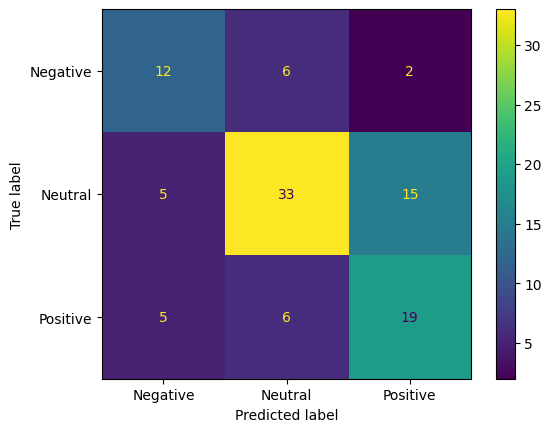

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test.argmax(1), y_pred_roberta.argmax(1)))
cm  = confusion_matrix(y_test.argmax(1), y_pred_roberta.argmax(1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Neutral', 'Positive'])
disp.plot()
plt.show()

In [ ]:
actual = pd.DataFrame({"Actual label": y_test.argmax(1)})

In [ ]:
predicted = pd.DataFrame({"Predicted label": y_pred_roberta.argmax(1)})

In [ ]:
full_results = pd.concat([X_test, actual, predicted], axis = 1)

In [ ]:
full_results.head()

,Cleaned_Tweets,Actual label,Predicted label
0,heard that tailing electric vehicles is going to have a new friend any idea,1,0
1,coronavirus dampens 2020 outlook for clean energy and electric vehicles as iea calls for green stimulus,1,1
2,tesla delivers 88400 electric vehicles beating expectations,1,1
3,watch british company lunaz rebuilds old dieselpowered recycling trucks into electric vehicles which are said to be greener and cheaper than an allnew electric equivalent,1,1
4,new approach for integrating electric vehicles into power grid,1,1


In [ ]:
full_results.loc[(full_results['Actual label'] == 0)& (full_results['Predicted label'] == 1)]

,Cleaned_Tweets,Actual label,Predicted label
15,worth a read evs,1,2
20,here are the annual uk vehicle registration for electric vehicles in december 1 in 6 cars registered were fully electric significantly higher than diesel electricvehicles buildbackbetter thanks for data,1,2
24,electric vehicles are unlike normal vehicles in that they have special shipping requirementsread more costtoshipacar electricvehiclessensitivebatteries evcarshipping insurancecoverage shipcartohawaii shipelectricvehiclessafely,1,2
26,it is an incomparable journey where theguruleads you from the visible to the invisible from the material to the divine from the ephemeral to the eternal thanks for being myguru happyguru purnima gurupurnima guru gurunanak happygurupurnima gowel scooter,1,2
39,facing up to the automotive innovation dilemma the rise of c connected a autonomous s shared e electric vehicles will reshape the industry the challenge in the meantime is survival futureofmobility mobility ev rt,1,2
41,the number of electric vehicles on the road just keeps growing is it time for you to make the switch were here to help visit for an uptodate list of our inventory,1,2
45,despite having its share of detractors the corn ethanol industry has continued to increase output in recent years a potential game changer in this equation is the development of batteryoperated electric vehicles agriculture agribusiness grain,1,2
46,have a question about electric vehicles evs charging or incentives contact us to get personalized support from one of our knowledgeable ev advisors norwoodma norwoodlight electric norwooddriveselectric electricvehicle incentives,1,2
47,have you thought about switching to electric vehicles yet are you ready for the change let us know your thoughts below have a look at our deals,1,2
57,new on electricvehicles 38 are likely to consider an ev for their next purchase just 17 are highly confident us will build needed charging infrastructure those optimistic on infrastructure most likely to consider buying,1,2
